In [93]:
import pandas as pd
import matplotlib.pyplot as mp

In [94]:
path_root = "./statistics/"

versions = ["redux","struct","coalesced"]
_INDEX_     = "NUM OF CORES"
_EXEC_TIME_ = "EXECUTION TIME"

In [95]:
%ls ./statistics

coalesced-aws.csv  normal/        struct-aws.csv      struct2-aws.csv
local/             redux-aws.csv  struct-opt-aws.csv  test.csv


In [107]:
#Load csv data into a panda array
def load_statistic(path):
    path = path_root + path + "-aws.csv"
    print("Loading: " + path)
    x = pd.read_csv(path)
    #x = x.set_index(_INDEX_)
    return x

In [108]:
#Load all files with name contained in versions eg: ["redux","struct"]
def load_all_statistics(versions):
    res = {}
    for v in versions:
        res[v] = load_statistic(v)
    return res

In [113]:
#Merge all statistics in a single dataframe (mantain only execution times)
def merge_statistics(statistics):
    merged = load_statistic("redux")
    for s in statistics:
        merged[s] = statistics[s][_EXEC_TIME_]
    merged = merged[["NUM OF CORES"] + versions]
    return merged

In [114]:
#Can plot versions comparisons by passing an array of versions names eg ["redux","struct"]
def plot_versions(versions_to_plot):
    merged.plot(x=_INDEX_, y=versions_to_plot,kind="line", figsize=(10, 10))
    # display plot
    mp.show()

In [115]:
statistics = load_all_statistics(versions)

merged = merge_statistics(statistics)


Loading: ./statistics/redux-aws.csv
Loading: ./statistics/struct-aws.csv
Loading: ./statistics/coalesced-aws.csv
Loading: ./statistics/redux-aws.csv


In [117]:
merged

,NUM OF CORES,redux,struct,coalesced
0,16,0.425617,0.466114,0.319937
1,25,0.463464,0.524589,0.335340
2,36,0.667788,0.665717,0.386682
3,49,1.018746,0.976122,0.474588
4,64,1.670904,1.446056,0.598059
5,81,2.595702,2.136893,0.788512
6,100,3.870425,3.029770,1.052209
7,121,5.647244,4.295276,1.421808
8,144,7.838579,5.923920,1.899554
9,169,10.899327,8.053699,2.483355


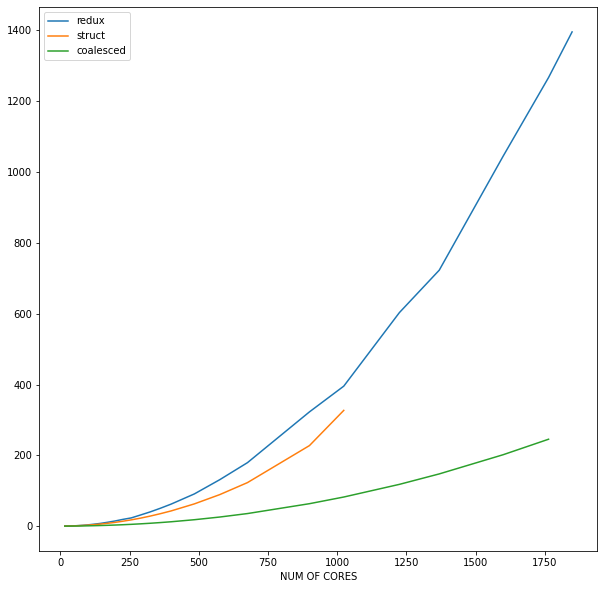

In [118]:
plot_versions(versions) #Can plot versions comparisons by passing an array of versions names eg ["redux","struct"]